In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [44]:
busstop = pd.read_excel('C:/Users/admin/Desktop/WithU-HJ/data/버스노선.xlsx')
busstop.head()

,BUSLINENUM,ORD,NAME,SIGUNNAME,GUNAME,DONGNAME,X,Y,UNIQUEID,BUSSTOPID
0,10,1,연제공용버스차고지,부산광역시,연제구,NaN,129.053172,35.185243,13179,50000001059
1,10,2,초읍고개,부산광역시,연제구,NaN,129.054089,35.185475,13183,50000002492
2,10,3,개인택시조합,부산광역시,연제구,거제2동,129.055711,35.186786,13132,21130521003
3,10,4,부산의료원,부산광역시,연제구,거제2동,129.060579,35.188257,13123,21130521007
4,10,5,삼정그린아파트,부산광역시,연제구,거제2동,129.063026,35.189483,13029,21130521008


In [45]:
busstop_cnt = busstop.groupby(['BUSLINENUM'])['NAME'].count()
busstop_cnt

BUSLINENUM
10          118
100         128
100-1       124
1000         80
1000(심야)    138
           ... 
9           101
90           24
96          105
96-1         99
99           67
Name: NAME, Length: 164, dtype: int64

In [46]:
busstop_cnt = busstop_cnt.to_frame(name='cnt')
busstop_cnt

,cnt
BUSLINENUM,
10,118
100,128
100-1,124
1000,80
1000(심야),138
...,...
9,101
90,24
96,105


In [47]:
busstop_cnt.to_csv('C:/Users/admin/Desktop/WithU-HJ/Bus_route/res/busstop_cnt.csv')

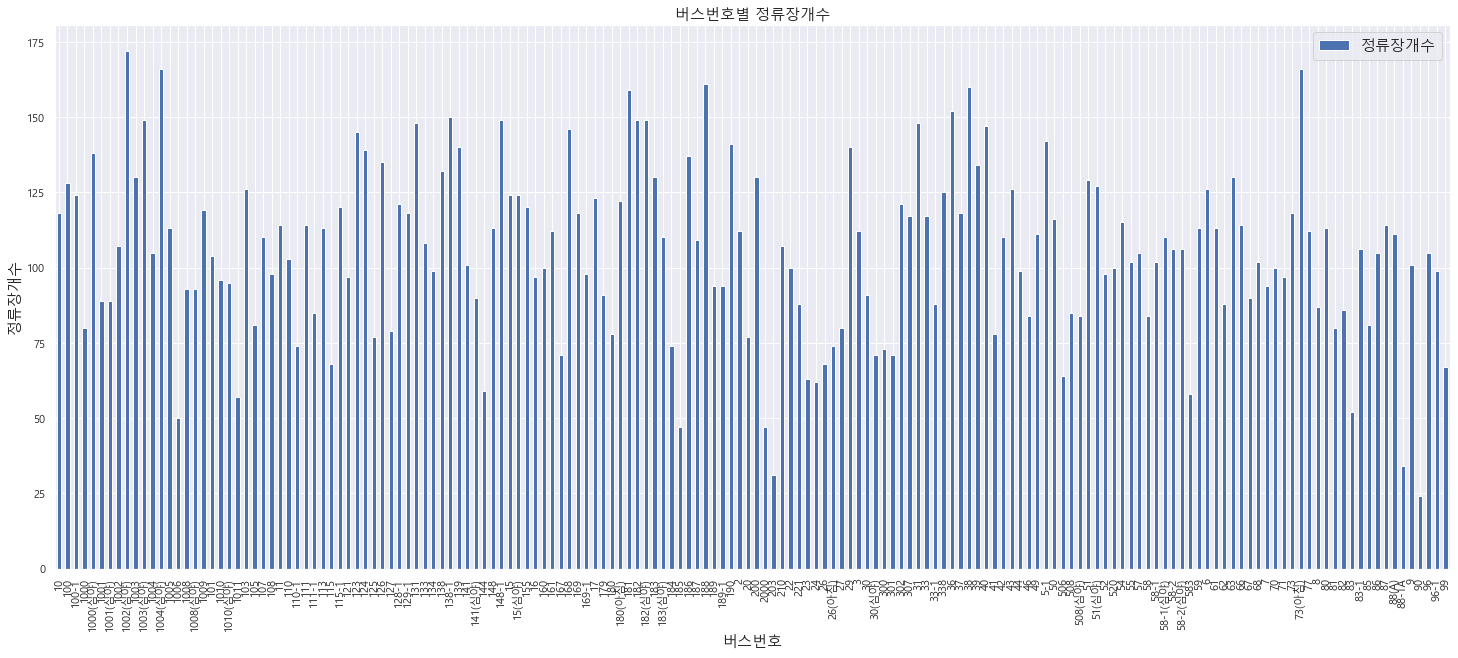

In [48]:
count = busstop_cnt[['cnt']]
plt.rcParams['figure.figsize'] = (25,10)
count.plot(kind='bar', rot=90)
plt.title(f'버스번호별 정류장개수', fontsize=15)
plt.xlabel('버스번호', fontsize=15)
plt.ylabel('정류장개수', fontsize=15)
plt.legend(['정류장개수'], fontsize=15)
plt.show()

In [49]:
busstop_cnt.describe()

,cnt
count,164.000000
mean,105.439024
std,28.241334
min,24.000000
25%,88.000000
50%,106.000000
75%,123.250000
max,172.000000


# 급행버스

In [50]:
busstop_ep = busstop[(busstop['BUSLINENUM'] == '1000') | (busstop['BUSLINENUM'] == '1000(심야)') | (busstop['BUSLINENUM'] == '1001') | (busstop['BUSLINENUM'] == '1001(심야)') | (busstop['BUSLINENUM'] == '1002') | (busstop['BUSLINENUM'] == '1002(심야)') | (busstop['BUSLINENUM'] == '1003') | (busstop['BUSLINENUM'] == '1003(심야)') | (busstop['BUSLINENUM'] == '1004') | (busstop['BUSLINENUM'] == '1004(심야)') | (busstop['BUSLINENUM'] == '1005') | (busstop['BUSLINENUM'] == '1006') | (busstop['BUSLINENUM'] == '1008') | (busstop['BUSLINENUM'] == '1008(심야)') | (busstop['BUSLINENUM'] == '1009') | (busstop['BUSLINENUM'] == '1010') | (busstop['BUSLINENUM'] == '1010(심야)') | (busstop['BUSLINENUM'] == '1011') | (busstop['BUSLINENUM'] == '2000') | (busstop['BUSLINENUM'] == '58-1(심야)')]
busstop_ep

,BUSLINENUM,ORD,NAME,SIGUNNAME,GUNAME,DONGNAME,X,Y,UNIQUEID,BUSSTOPID
370,1000,1,다대포,부산광역시,사하구,다대1동,128.961603,35.049335,NaN,21100621006
371,1000,2,다대포해수욕장역,부산광역시,사하구,다대1동,128.965308,35.048235,10200,21100621021
372,1000,3,다대포해수욕장,부산광역시,사하구,다대1동,128.970094,35.049065,10192,21100621020
373,1000,4,다대자유아파트,부산광역시,사하구,다대1동,128.970965,35.051573,10190,21100621024
374,1000,5,다대우신아파트,부산광역시,사하구,다대1동,128.970774,35.054727,10187,21100621025
...,...,...,...,...,...,...,...,...,...,...
14089,58-1(심야),106,안청초등학교,경상남도,진해구,웅동1동,128.807404,35.100239,NaN,38040651003
14090,58-1(심야),107,코아루아파트,경상남도,진해구,웅동1동,128.806493,35.101421,NaN,38040651001
14091,58-1(심야),108,안골포초등학교,부산광역시,강서구,가락동,128.806624,35.103992,NaN,21120551001
14092,58-1(심야),109,부영3차아파트,경상남도,진해구,웅동2동,128.804729,35.104309,NaN,38040661019


In [51]:
busstop_ep_cnt = busstop_ep.groupby(['BUSLINENUM'])['NAME'].count()
busstop_ep_cnt

BUSLINENUM
1000         80
1000(심야)    138
1001         89
1001(심야)     89
1002        107
1002(심야)    172
1003        130
1003(심야)    149
1004        105
1004(심야)    166
1005        113
1006         50
1008         93
1008(심야)     93
1009        119
1010         96
1010(심야)     95
1011         57
2000         47
58-1(심야)    110
Name: NAME, dtype: int64

In [52]:
busstop_ep_cnt = busstop_ep_cnt.to_frame(name='cnt')
busstop_ep_cnt

,cnt
BUSLINENUM,
1000,80
1000(심야),138
1001,89
1001(심야),89
1002,107
1002(심야),172
1003,130
1003(심야),149
1004,105


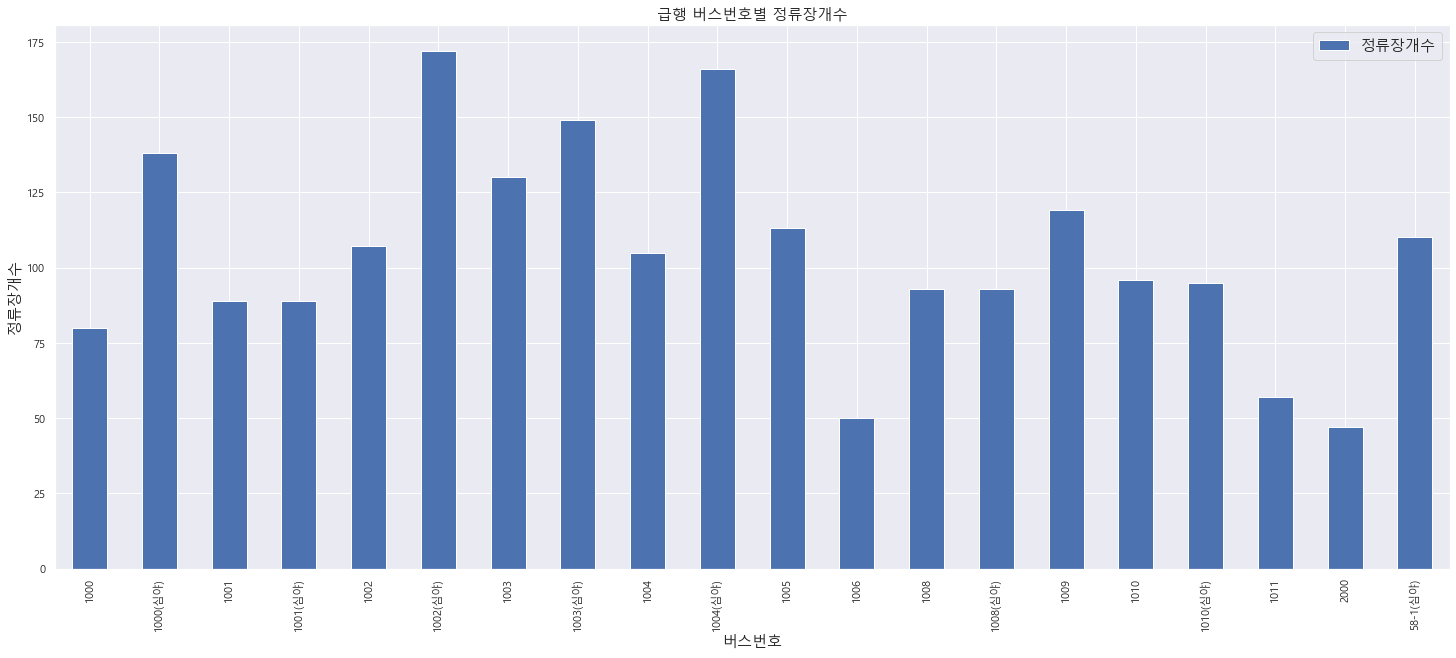

In [53]:
count = busstop_ep_cnt[['cnt']]
plt.rcParams['figure.figsize'] = (25,10)
count.plot(kind='bar', rot=90)
plt.title(f'급행 버스번호별 정류장개수', fontsize=15)
plt.xlabel('버스번호', fontsize=15)
plt.ylabel('정류장개수', fontsize=15)
plt.legend(['정류장개수'], fontsize=15)
plt.show()

In [54]:
busstop_ep_cnt.describe()

,cnt
count,20.000000
mean,104.900000
std,34.372419
min,47.000000
25%,89.000000
50%,100.500000
75%,121.750000
max,172.000000
